**LUNG CANCER SURVIVAL PREDICTION PROJECT**

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset

df = pd.read_csv('cancer_dataset.csv')

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [4]:
df.shape

(890000, 17)

In [5]:
# checking for nulls

df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [6]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Convert dates: diagnosis_date, end_treatment_date → datetime

df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

In [8]:
def engineer_features(df):
    """
    Adds new features to the DataFrame:
    - treatment_duration_days: Number of days between diagnosis and end of treatment
    - age_group: Categorical bins for patient age
    - bmi_category: Categorical bins for BMI

    Parameters:
    df (pd.DataFrame): The original DataFrame

    Returns:
    pd.DataFrame: DataFrame with new engineered features
    """

    # Ensure date columns are datetime
    df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
    df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

    # 1. Treatment duration (in days)
    df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

    # 2. Age groups
    age_bins = [0, 30, 45, 60, 75, 90, np.inf]
    age_labels = ['<30', '30-44', '45-59', '60-74', '75-89', '90+']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    # 3. BMI categories (WHO standards)
    def bmi_category(bmi):
        if pd.isnull(bmi):
            return 'Unknown'
        elif bmi < 18.5:
            return 'Underweight'
        elif bmi < 25:
            return 'Normal'
        elif bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'

    df['bmi_category'] = df['bmi'].apply(bmi_category)

    return df

In [9]:
df = engineer_features(df)

# Preview new features
df[['treatment_duration_days', 'age_group', 'bmi_category']].head()


,treatment_duration_days,age_group,bmi_category
0,523,60-74,Overweight
1,424,45-59,Obese
2,370,60-74,Obese
3,443,45-59,Obese
4,406,30-44,Normal


C:\Users\KOJO\AppData\Local\Temp\ipykernel_4636\1479563516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bmi_category', palette='coolwarm')


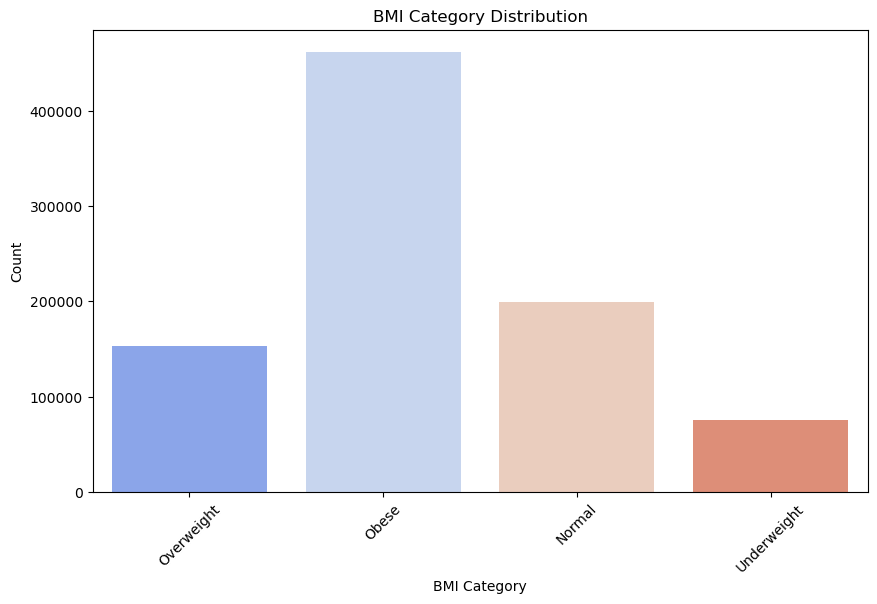

In [10]:
# BMI category distribution

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bmi_category', palette='coolwarm')
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
df['country'].value_counts()

country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

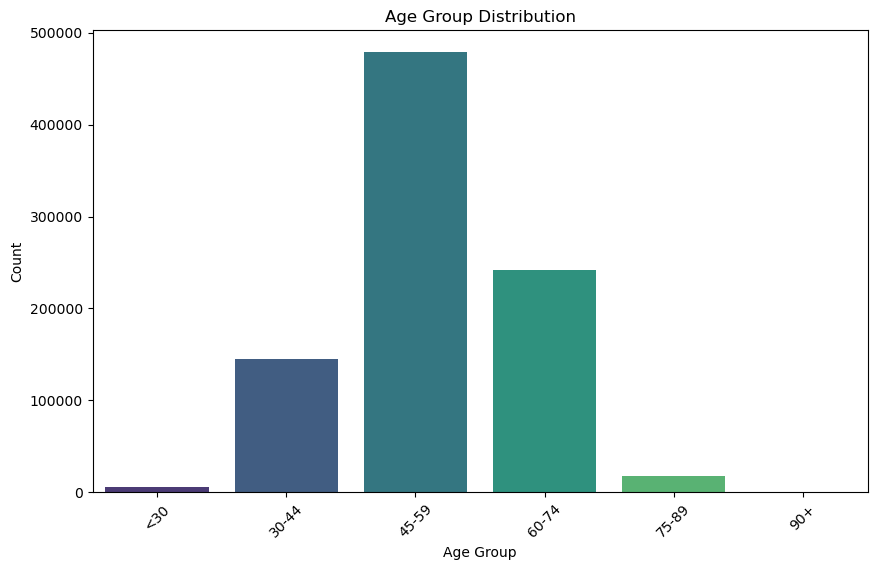

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='age_group', palette='viridis', legend=False)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

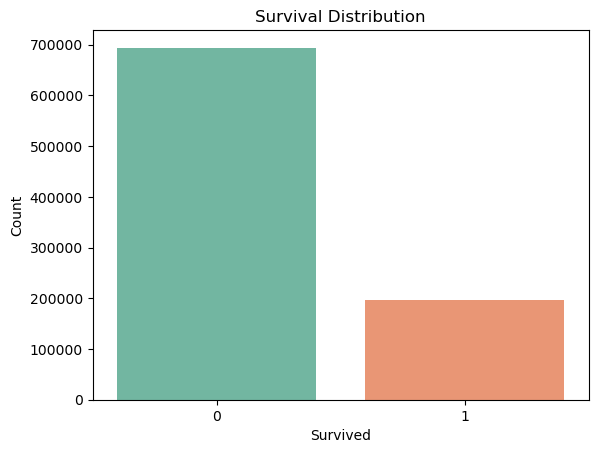

In [13]:
sns.countplot(data=df, x='survived', hue='survived', palette='Set2', legend=False)
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

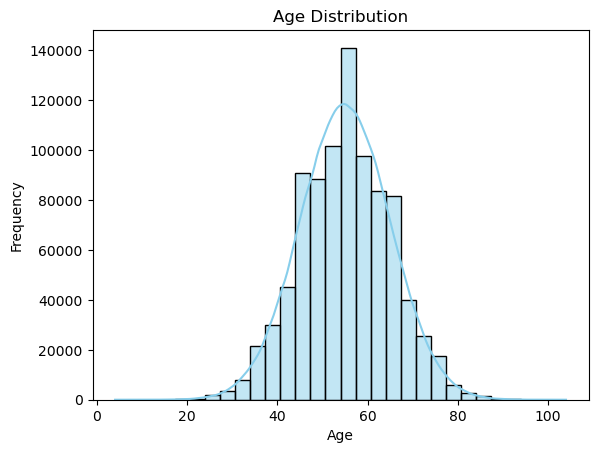

In [14]:
# Age Distribution
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



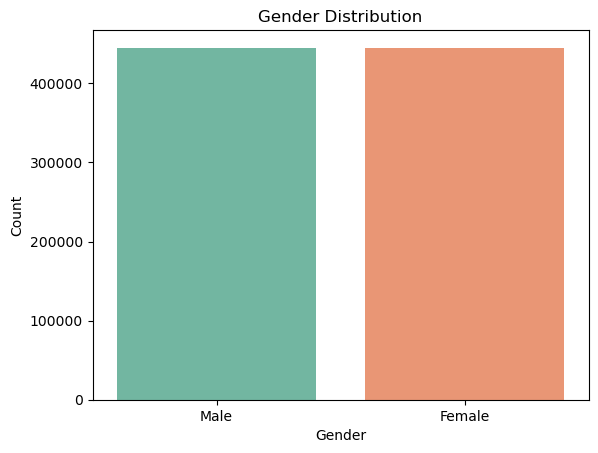

In [15]:
# Gender Distribution (fixed FutureWarning)
sns.countplot(data=df, x='gender', hue='gender', palette='Set2', legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

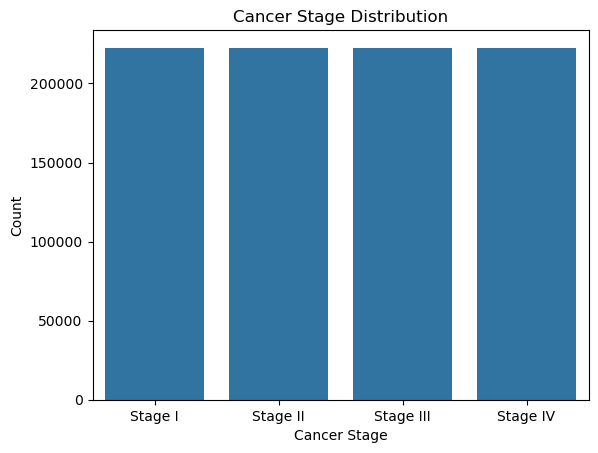

In [16]:
# Cancer Stage Distribution
sns.countplot(data=df, x='cancer_stage', order=sorted(df['cancer_stage'].dropna().unique()))
plt.title("Cancer Stage Distribution")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()



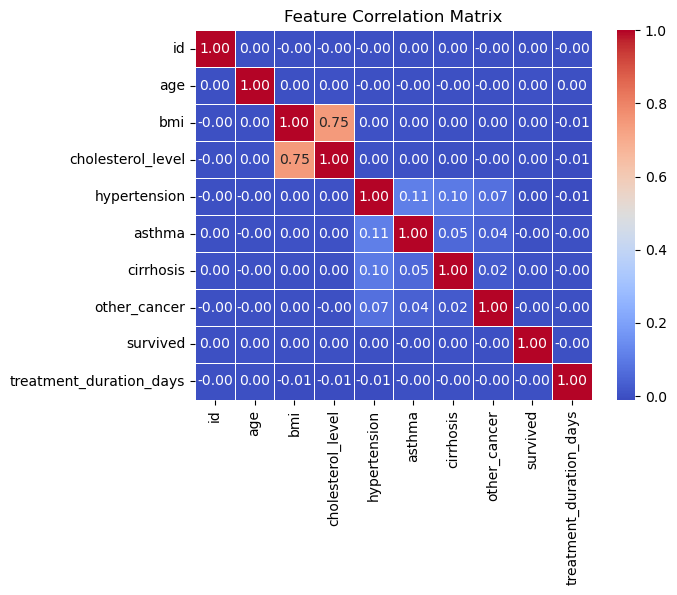

In [17]:
# HEAT MAP FOR Correlation Matrix 
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()



**Model Selection & Training**

In [18]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration_days,age_group,bmi_category
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523,60-74,Overweight
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424,45-59,Obese
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370,60-74,Obese
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443,45-59,Obese
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406,30-44,Normal


In [19]:
# importing models for classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


Feature Selection

In [20]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration_days,age_group,bmi_category
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523,60-74,Overweight
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424,45-59,Obese
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370,60-74,Obese
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443,45-59,Obese
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406,30-44,Normal


In [21]:
# separating features and target variable
X = df.drop(columns=['survived', 'diagnosis_date', 'end_treatment_date', 'age_group'])
y = df['survived']

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric after one-hot encoding
X = X.select_dtypes(include=[np.number])



In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline

# Create a pipeline that scales data before logistic regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),    # Keep 95% of variance 
    ('logreg', LogisticRegression(penalty='l2', solver='lbfgs'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('logreg', LogisticRegression())])

In [24]:
# testing the model on train data
x_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(x_train_pred, y_train)

In [25]:
print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.78


In [26]:
# testing model on test data
x_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(x_test_pred, y_test)

In [27]:
print(f"Training Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.78
